<a href="https://colab.research.google.com/github/mongango/Used-Car-Price-Prediction-/blob/main/ML_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Context:**

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has contributed to grow over the past few years and is now larger than the new car market. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car owners replace their old vehicles with pre-owned cars instead of buying new automobile.

Unlike new cars, where price and supply were fairly deterministic and managed by OEMs (Original Equipment Manufacturer? Expect for dealership level discounts which come into play only in the last stage of the customer journey), the used car market is a very different beast, with large uncertainties ion both pricing and supply. Several factors, including mileage, brand, model, year etc can influence the actual worth of a car. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market. 



### **The objective:**

Come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using different pricing 

###Data Dictionary

S.No. : Serial Number

Name : Name of the car which includes Brand name and Model name

Location : The location in which the car is being sold or is available for purchase (Cities)

Year : Manufacturing year of the car

Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM

Fuel_Type : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

Transmission : The type of transmission used by the car (Automatic / Manual)

Owner : Type of ownership

Mileage : The standard mileage offered by the car company in kmpl or km/kg

Engine : The displacement volume of the engine in CC

Power : The maximum power of the engine in bhp

Seats : The number of seats in the car

New_Price : The price of a new car of the same model in INR 100,000

Price : The price of the used car in INR 100,000 (Target Variable)

Loading libraries

In [1]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

let's load the data

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# loading the dataset
data = pd.read_csv("/content/drive/MyDrive/used_cars.csv")


observing the data rows

In [4]:
#observing the first 5 rows of the data
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [5]:
#observing the last 5 rows of the data
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


In [6]:
#checking the data types of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [7]:
#checking the total number of missing values
data.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

observations

We can observe that S.No. has no null values. Also the number of unique values are equal to the number of observations. So, S.No. looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence, it can be dropped

###EDA

In [8]:
# Explore basic summary statistics of numeric variables.
data.describe()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price
count,7253.000000,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7200.000000,1006.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,18.141580,1616.573470,112.765214,5.280417,22.779692,9.479468
std,2093.905084,3.254421,8.442772e+04,4.562197,595.285137,53.493553,0.809277,27.759344,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,3.910000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,7.885000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,18.160000,1493.000000,94.000000,5.000000,11.570000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,26.042500,9.950000
max,7252.000000,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,375.000000,160.000000


**observations**
- 50% of the cars in the data set have at least 5 seats
- the mean maximum power generated by a car is about 113 horse power. 
- the maximum mileage on a car is about 34 km/kg
- the mean price of an old car is approximately  INR 900000
- the maximum new price of a new car is INR 37500000

In [9]:
# Explore basic summary statistics of categorical variables
data.describe(include = 'object')

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,7253,7253,7253,7253,7253
unique,2041,11,5,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,55,949,3852,5204,5952


**observations**
- There are 5 unique fuel types used with the highest fuel type used being Diesel having 3852 instances. 
- There are 4 unique owner types
- There are 11 unique locations where the car is being sold. 

In [10]:
#Number of unique observations in each category
cat_cols = data.select_dtypes(include = ['object']).columns

for column in cat_cols:
    
    print("For column:", column)
    
    print(data[column].unique())
    print('number of Unique values is' ,data[column].nunique())
    
    print('-'*50)

For column: Name
['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Ford EcoSport 1.5 Petrol Ambiente'
 'Jeep Compass 1.4 Sport' 'Hyundai Elite i20 Magna Plus']
number of Unique values is 2041
--------------------------------------------------
For column: Location
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
number of Unique values is 11
--------------------------------------------------
For column: Fuel_Type
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
number of Unique values is 5
--------------------------------------------------
For column: Transmission
['Manual' 'Automatic']
number of Unique values is 2
--------------------------------------------------
For column: Owner_Type
['First' 'Second' 'Fourth & Above' 'Third']
number of Unique values is 4
--------------------------------------------------


**observations**
- There 2041 unique car name values 

Think About It:

We could observe from summary statistics that kilometers_driven has extreme values. Can we look at the manufactured year for cars with extreme values for kilometers_driven?
Also, we could observe the feature mileage has values zero. Can the mileage of a car be zero?

In [11]:
from pickle import FALSE
#Check Kilometers_Driven extreme values
data.sort_values(by = 'Kilometers_Driven',ascending = False).head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


**Observations and Insights:**

In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.

In [12]:
# Removing the 'row' at index 2328 from the data
data.drop(index = 2328, inplace= True)

In [13]:
#Check Mileage extreme values
data.sort_values(by ='Mileage', ascending = True).head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


**Observations**
- Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part.

####Univariate Analysis

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

#####1. Univariate Analysis - Numerical Data

Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [14]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize = (15, 10), bins = None):
    
    """ Boxplot and histogram combined
    
    feature: 1-d feature array
    
    figsize: size of fig (default (9, 8))
    
    bins: number of bins (default None / auto)
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid = 2
                                           sharex = True, # X-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # Creating the 2 subplots
    
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color = 'violet') # Boxplot will be created and a symbol will indicate the mean value of the column
    
    sns.distplot(feature, kde = F, ax = ax_hist2, bins = bins, palette = "winter") if bins else sns.distplot(feature, kde = False, ax = ax_hist2) # For histogram
    
    ax_hist2.axvline(np.mean(feature), color = 'green', linestyle = '--') # Add mean to the histogram
    
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median to the histogram

Let us plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any

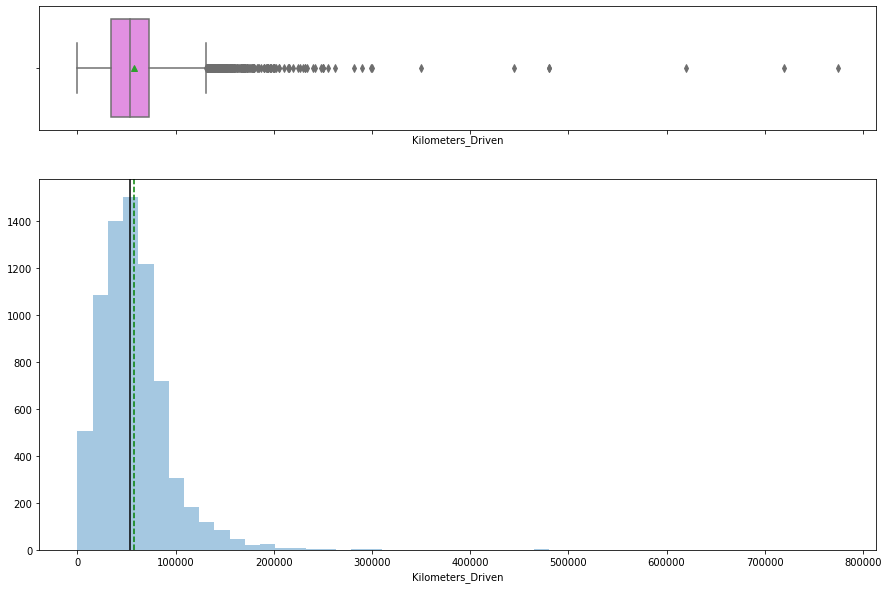

In [15]:
# Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data['Kilometers_Driven'])

Think About It: Kilometers_Driven is highly right-skewed. Can we use Log transformation of the feature to reduce/remove the skewness? Why can't we keep skewed data?

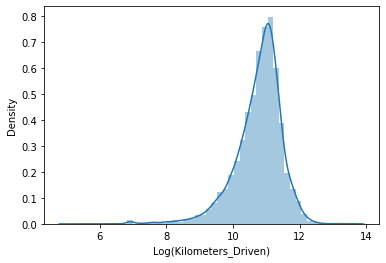

In [16]:
# Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)");

**observations**
- After the log transformation, the kilometers_driven values are less skewed thant they were before the transfomration

In [17]:
# We can add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

Note: Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as 'price_log'.

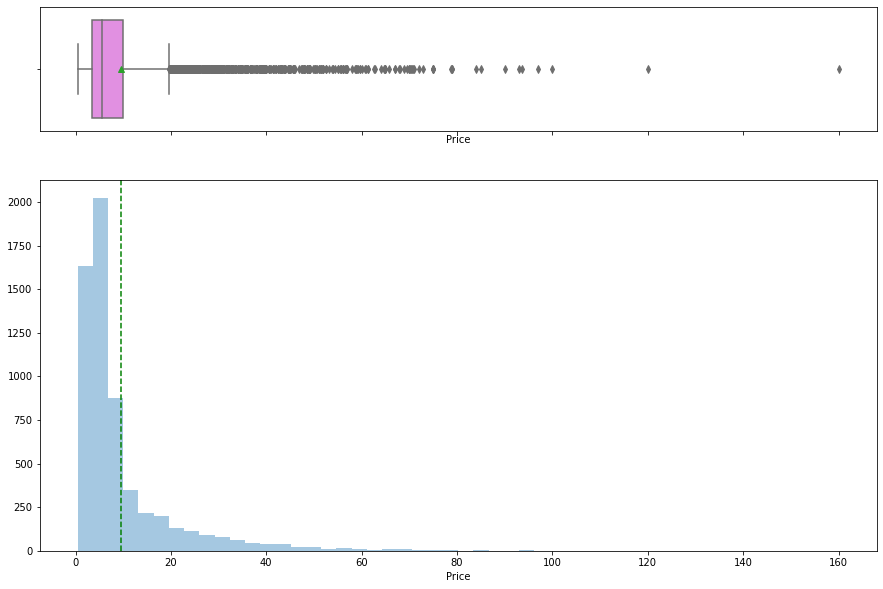

In [18]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(data['Price'])

**Observations**

The plot is too right skewed. We will then use log transformation to make it less right skewed and more normally distributed

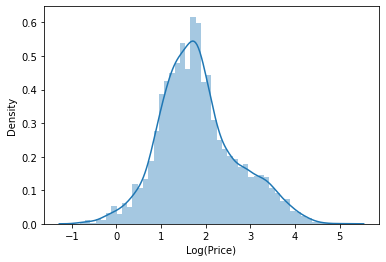

In [19]:
# Log transformation of the feature 'Price'
sns.distplot(np.log(data["Price"]), axlabel = "Log(Price)");

In [20]:
# We can Add a transformed Price feature in data
data["Price"] = np.log(data["Price"])

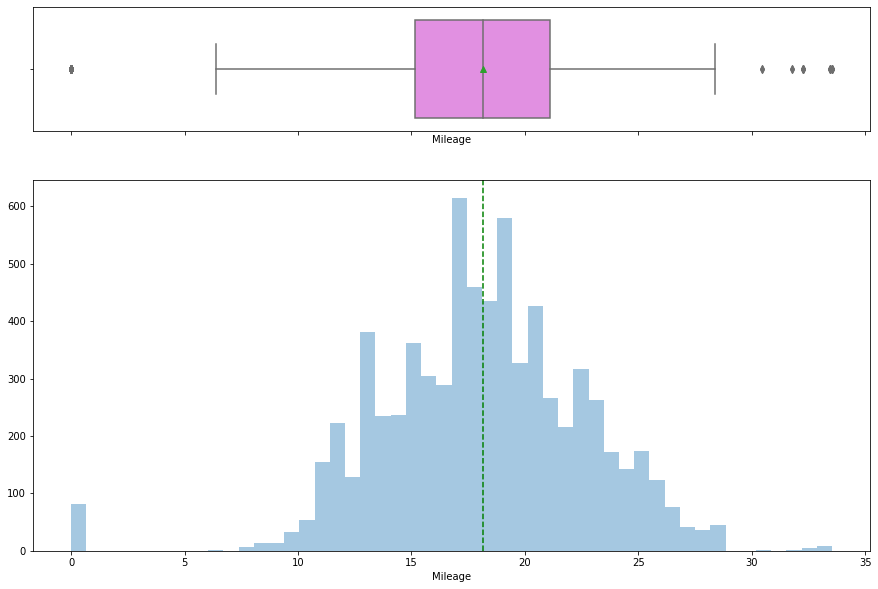

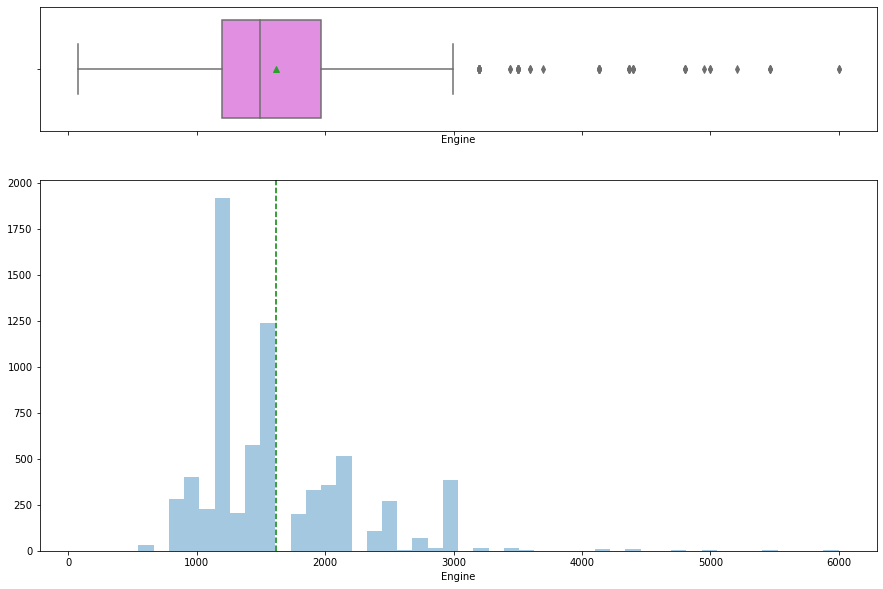

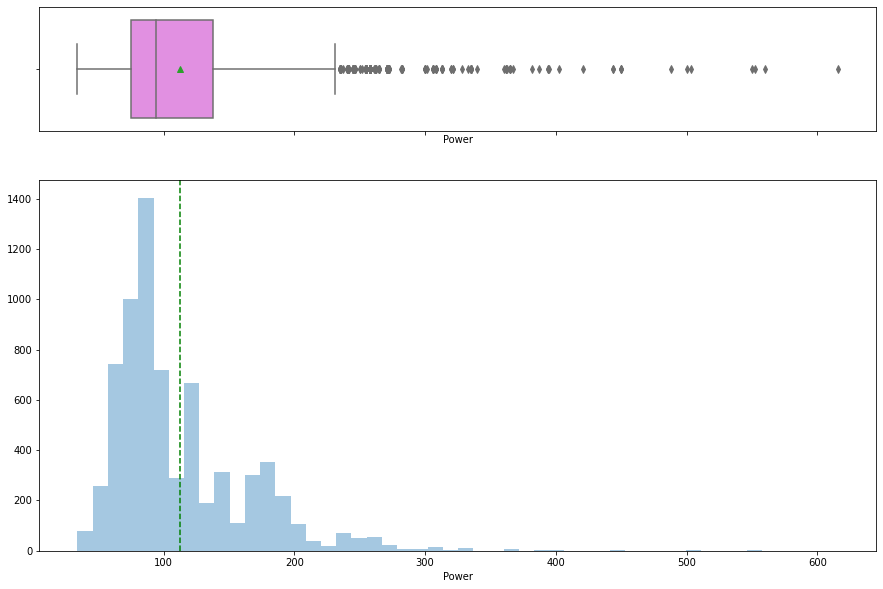

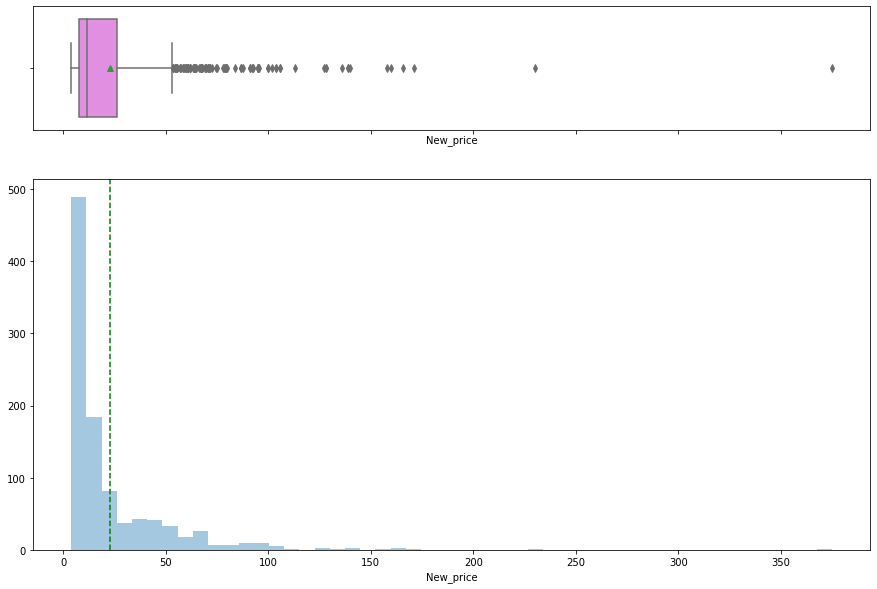

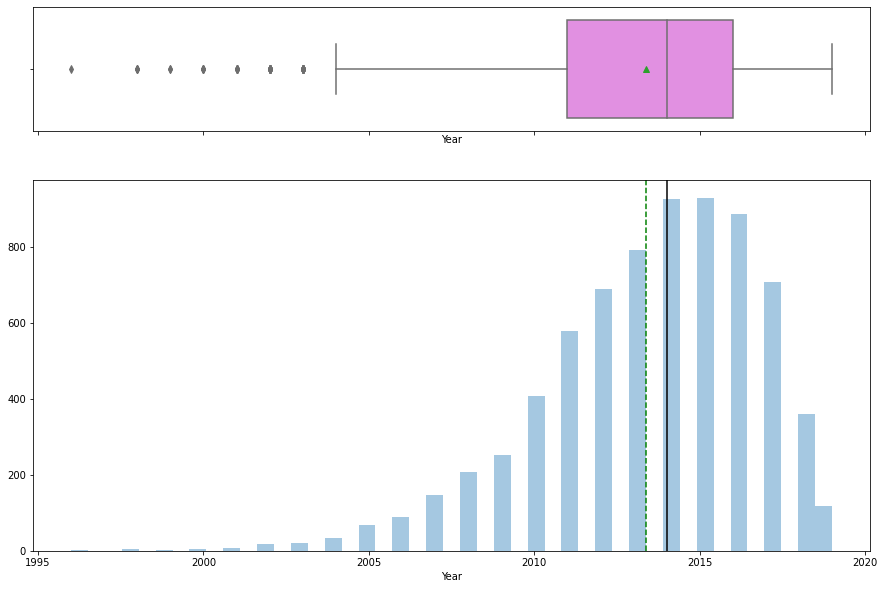

In [21]:
cat_var  = ['Mileage', 'Engine','Power', 'New_price', 'Year']
for i in cat_var:
  histogram_boxplot(data[i])

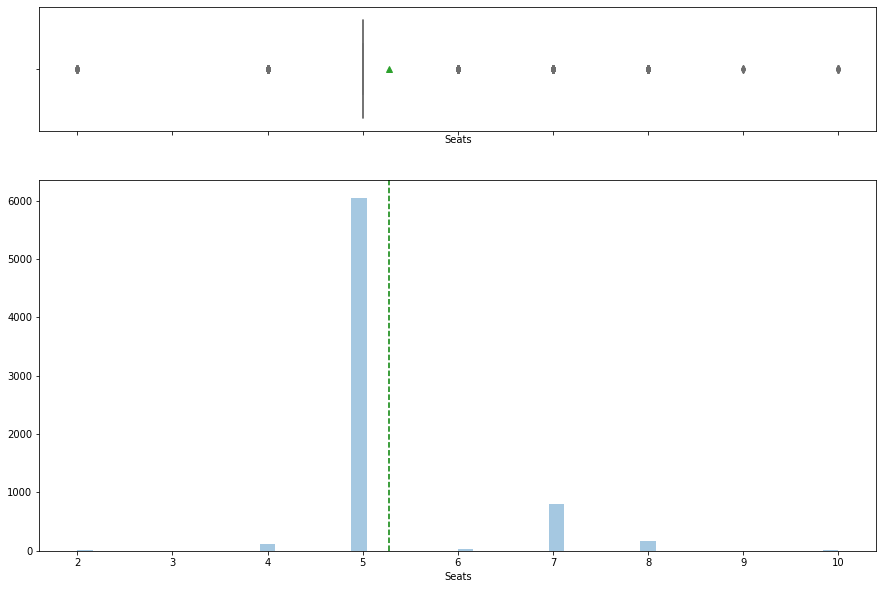

In [22]:
histogram_boxplot(data['Seats'])

**Observations**
- Mileage is normaly distributed
- **Engine**, **power** and **new price** are right skewed while **year** is left skewed  

#####2.  Univariate analysis - Categorical Data


In [23]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # Length of the column
    
    plt.figure(figsize = (15, 5))
    
    ax = sns.countplot(data[z], palette = 'Paired', order = data[z].value_counts().index)
    
    for p in ax.patches:
        
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class of the category
        
        x = p.get_x() + p.get_width() / 2 - 0.05 # Width of the plot
        
        y = p.get_y() + p.get_height()           # Hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # Annotate the percantage 
    
    plt.show() # Show the plot

Let us plot barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.

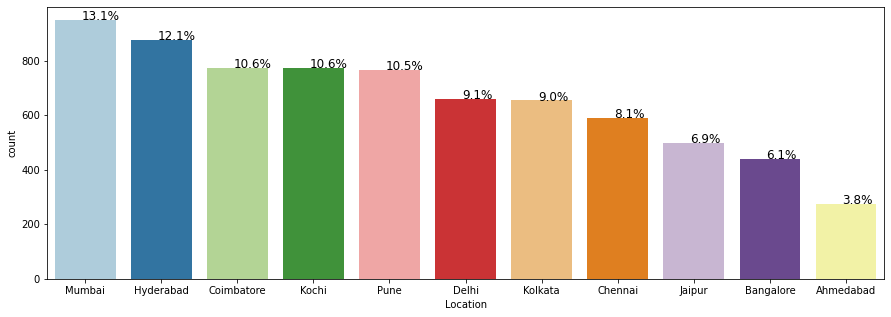

In [24]:

# Bar Plot for 'Location'
perc_on_bar('Location')

Note: Explore for other variables like Year, Fuel_Type, Transmission, Owner_Type`.

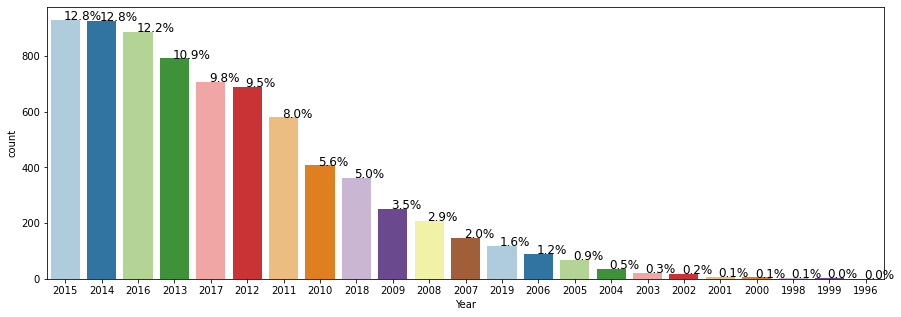

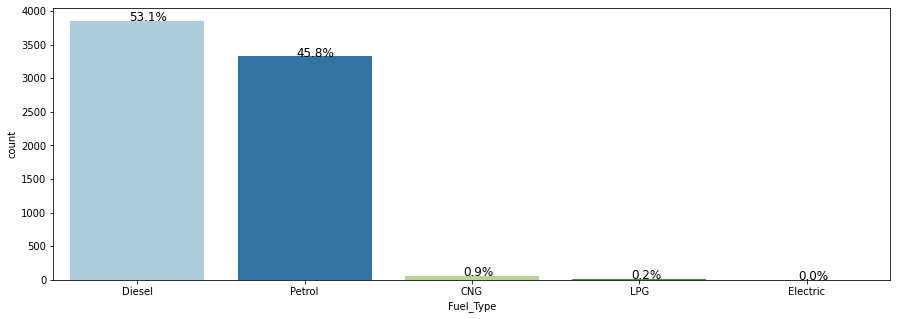

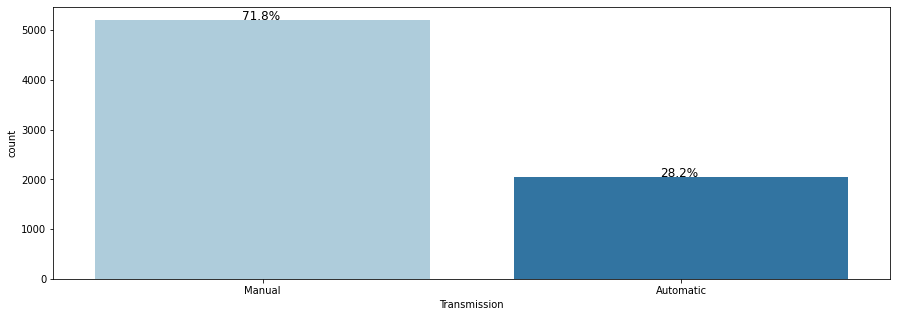

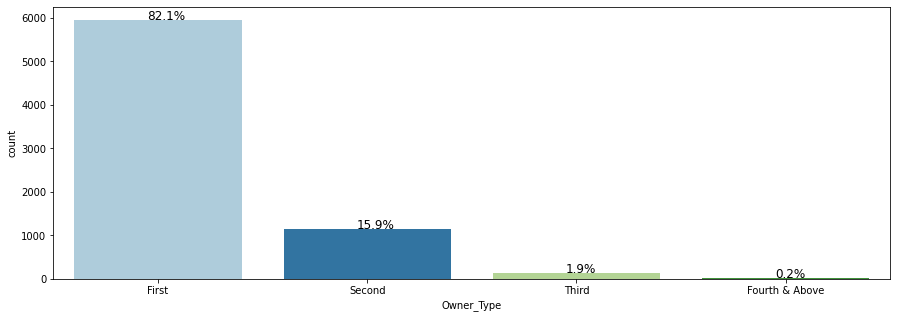

In [25]:
cols = ['Year', 'Fuel_Type', 'Transmission', 'Owner_Type' ]
for x in cols:
  perc_on_bar(x)

Observations and Insights from all plots

Heat map

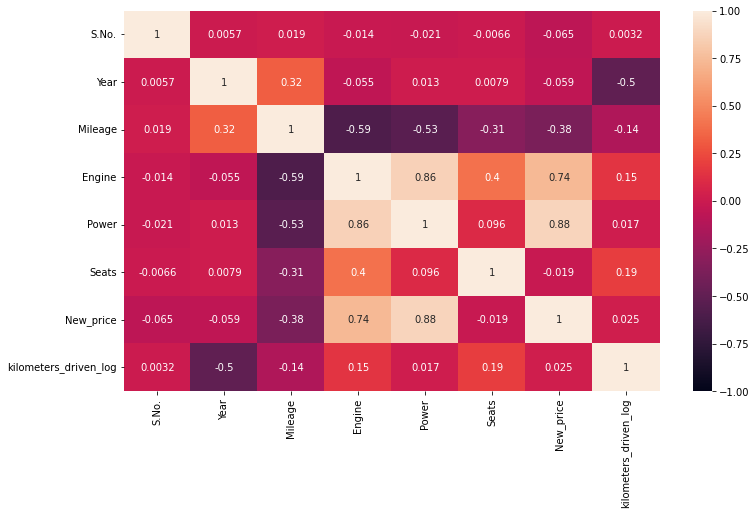

In [26]:
# We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize = (12, 7))

sns.heatmap(data.drop(['Kilometers_Driven', 'Price' ],axis = 1).corr(), annot = True, vmin = -1, vmax = 1)

plt.show()

**observations**
- The displacement volume of the engine is highly correlated with power. This makes sense since a lot of power is required to displace a high volume.
- The new price of a car is also highly positively correlated with the engine (displacement volume of the engine)
- most of the correlation between the variables are low. 

Box plot

In [27]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    
    plt.figure(figsize = (12, 5)) # Setting size of boxplot
    
    sns.boxplot(x = z, y = data['Price']) # Defining x and y
    
    plt.title('With Outliers')

    plt.show()
    
    plt.figure(figsize = (12, 5))
    
    plt.title('Without Outliers')
    
    sns.boxplot(x = z, y = data['Price'], showfliers = False) # Turning off the outliers
    
    plt.show()

Let us now plot bivariate analysis of target variable with a categorical variable 'Location'

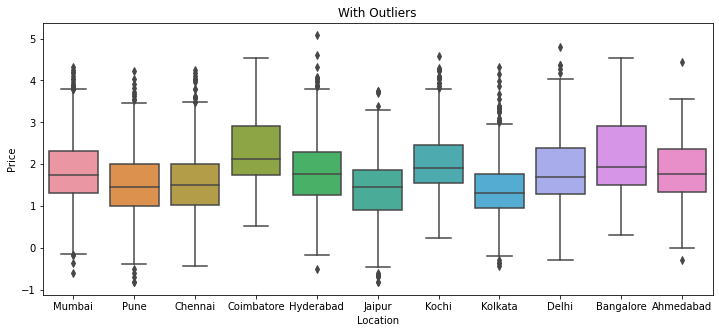

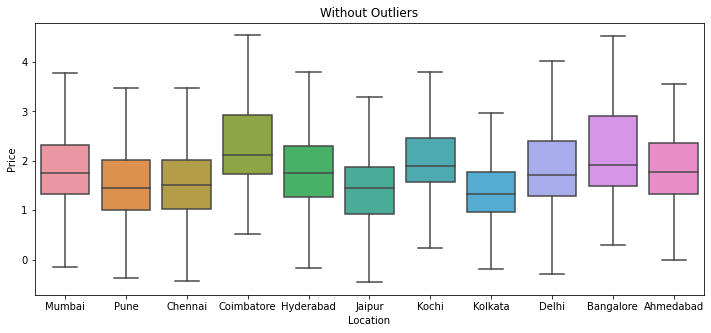

In [28]:
# Box Plot: Price vs Location
boxplot(data['Location'])

Note: Explore by plotting box-plots for target variable and the other categorical variables like Fuel_Type, transmission, Owner_type.

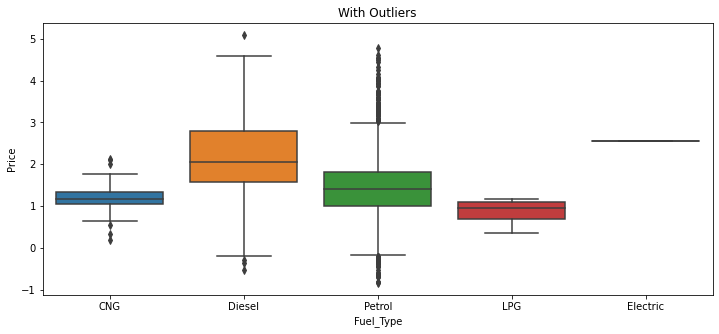

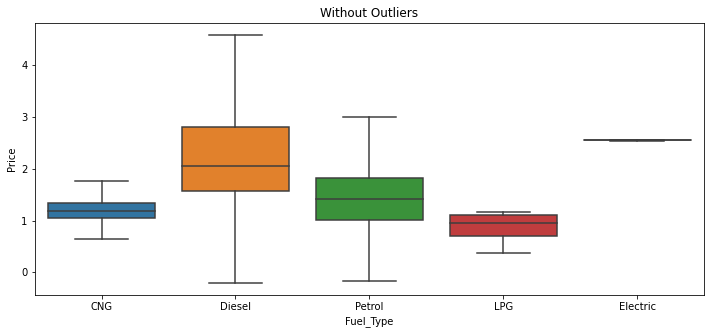

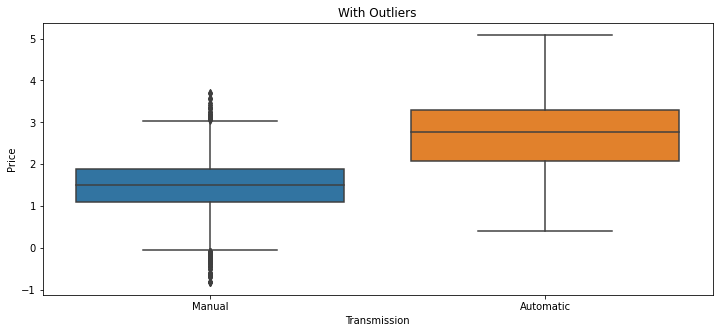

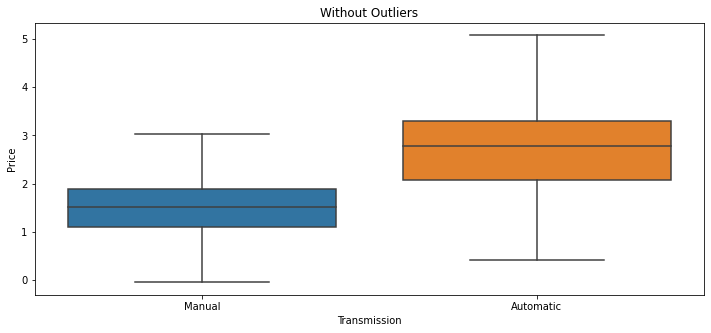

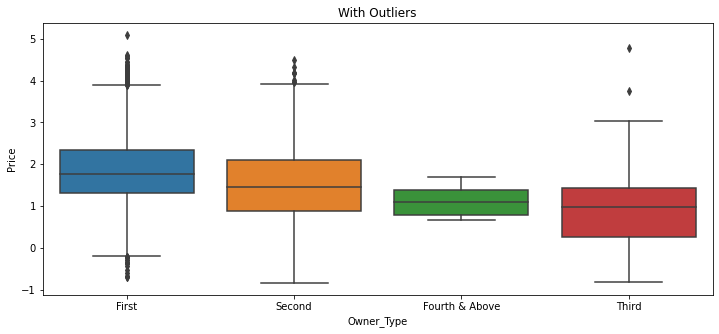

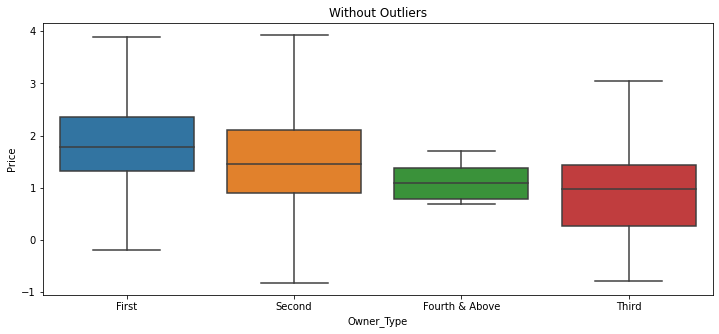

In [29]:
cat_vars = [data['Fuel_Type'], data['Transmission'],data['Owner_Type']]
for var in cat_vars:
  boxplot(var)

**Observations**
- It's observed that diesel, automatic, and first hand cars usually priced higher than other components in their field. 

Feature Engineering

Think about it: The Name column in the current format might not be very useful in our analysis. Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column?

Hint: With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [30]:
#splitting the car name under the name column 
make_car = data['Name'].str.split(" ", expand = True)

In [31]:
#Assign 'brand name' to the first string of letters under the name column 
data['brand_name'] = make_car[0]

In [32]:
data['brand_name']

0              Maruti
1             Hyundai
2               Honda
3              Maruti
4                Audi
            ...      
7248       Volkswagen
7249       Volkswagen
7250           Nissan
7251       Volkswagen
7252    Mercedes-Benz
Name: brand_name, Length: 7252, dtype: object

In [33]:
#get the unique values under brand_name
print(data['brand_name'].unique())
print('The number of unique values in brand_name are', data['brand_name'].nunique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']
The number of unique values in brand_name are 33


**Observations**
- There are 33 unique brand names in the data set. 

### **Missing value treatment**

In [34]:
#checking the missing values in each column 
data.isnull().sum()

S.No.                       0
Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
kilometers_driven_log       0
brand_name                  0
dtype: int64

**Observations**
- Among the whole data set, Mileage, Engine, Power, Seats, New_Price, and Price are the columns that have missing values.  

**Missing values in Seats**

In [35]:
#Missing values in Seats
missing_value_in_seats = data[data['Seats'].isnull()]
missing_value_in_seats

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,brand_name
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,1.081805,11.002200,Honda
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,0.746688,10.645449,Maruti
229,229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.00,1498.0,99.0,NaN,NaN,1.280934,11.162460,Ford
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,NaN,0.559616,11.490680,Maruti
749,749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,NaN,3.277145,10.915107,Land
1294,1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,NaN,1.163151,10.915179,Honda
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,1.757858,10.825661,Maruti
1385,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,NaN,0.405465,11.652687,Honda
1460,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,3.710641,11.142992,Land
1917,1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.00,1493.0,100.0,NaN,NaN,0.530628,11.385092,Honda


In [36]:
#getting the median number of seats in each model
car_name_unique = data['Name'].unique()
for i in car_name_unique:
  car_name = data.loc[data['Name'] == i]
  car_seats_median = car_name['Seats'].median()
  #print(i, car_seats_median)

In [37]:
#Filling in the median number of seats into the missing ones
data['Seats'] = data['Seats'].fillna(car_seats_median)
missing_value_in_seats['Seats'] = missing_value_in_seats['Seats'].fillna(car_seats_median)

In [38]:
#checking the missing value in seats 
missing_value_in_seats

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,brand_name
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,5.0,NaN,1.081805,11.002200,Honda
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,5.0,NaN,0.746688,10.645449,Maruti
229,229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.00,1498.0,99.0,5.0,NaN,1.280934,11.162460,Ford
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,5.0,NaN,0.559616,11.490680,Maruti
749,749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,5.0,NaN,3.277145,10.915107,Land
1294,1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,5.0,NaN,1.163151,10.915179,Honda
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,5.0,NaN,1.757858,10.825661,Maruti
1385,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,5.0,NaN,0.405465,11.652687,Honda
1460,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,5.0,NaN,3.710641,11.142992,Land
1917,1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.00,1493.0,100.0,5.0,NaN,0.530628,11.385092,Honda


**Missing values for Mileage**

In [39]:
#missing values in mileage 
missing_value_in_mileage = data[data['Mileage'].isnull()]
missing_value_in_mileage

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,brand_name
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,2.564949,10.819778,Mahindra
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,2.545531,10.691945,Toyota


In [40]:
#getting the median value of mileage in each model
car_name_unique = data['Name'].unique()
for i in car_name_unique:
  car_name = data.loc[data['Name'] == i]
  car_mileage_median = car_name['Mileage'].median()
  #print(i, car_mileage_median)

In [41]:
#Filling in the median Mileage number into the missing ones
data['Mileage'] = data['Mileage'].fillna(car_mileage_median)
missing_value_in_mileage['Mileage'] = missing_value_in_mileage['Mileage'].fillna(car_mileage_median)

In [42]:
#checking the missing value in Mileage 
missing_value_in_mileage

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,brand_name
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,18.6,72.0,41.0,5.0,13.58,2.564949,10.819778,Mahindra
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,18.6,1798.0,73.0,5.0,NaN,2.545531,10.691945,Toyota


**Missing values for Engine**

In [43]:
#missing values in Engine 
missing_value_in_engine = data[data['Engine'].isnull()]
missing_value_in_engine

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,brand_name
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,5.0,NaN,1.081805,11.002200,Honda
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,5.0,NaN,0.746688,10.645449,Maruti
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,5.0,NaN,0.559616,11.490680,Maruti
749,749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,5.0,NaN,3.277145,10.915107,Land
1294,1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,5.0,NaN,1.163151,10.915179,Honda
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,5.0,NaN,1.757858,10.825661,Maruti
1385,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,5.0,NaN,0.405465,11.652687,Honda
1460,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,5.0,NaN,3.710641,11.142992,Land
2074,2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.10,NaN,NaN,5.0,NaN,1.147402,10.096378,Maruti
2096,2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.00,NaN,NaN,5.0,NaN,0.657520,10.861803,Hyundai


In [44]:
#getting the median value of Engine in each model
car_name_unique = data['Name'].unique()
for i in car_name_unique:
  car_name = data.loc[data['Name'] == i]
  car_engine_median = car_name['Engine'].median()
  #print(i, car_engine_median)

In [45]:
#Filling in the median engine number into the missing ones
data['Engine'] = data['Engine'].fillna(car_engine_median)
missing_value_in_engine['Engine']= missing_value_in_engine['Engine'].fillna(car_engine_median)

In [46]:
#checking the missing value in engine
missing_value_in_engine

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,brand_name
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,1197.0,NaN,5.0,NaN,1.081805,11.002200,Honda
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,1197.0,NaN,5.0,NaN,0.746688,10.645449,Maruti
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,1197.0,NaN,5.0,NaN,0.559616,11.490680,Maruti
749,749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,1197.0,NaN,5.0,NaN,3.277145,10.915107,Land
1294,1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,1197.0,NaN,5.0,NaN,1.163151,10.915179,Honda
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,1197.0,NaN,5.0,NaN,1.757858,10.825661,Maruti
1385,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,1197.0,NaN,5.0,NaN,0.405465,11.652687,Honda
1460,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,1197.0,NaN,5.0,NaN,3.710641,11.142992,Land
2074,2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.10,1197.0,NaN,5.0,NaN,1.147402,10.096378,Maruti
2096,2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.00,1197.0,NaN,5.0,NaN,0.657520,10.861803,Hyundai


**Missing values for Power**

In [47]:
#missing values in Power
missing_value_in_power = data[data['Power'].isnull()]
missing_value_in_power

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,brand_name
76,76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.0,NaN,5.0,NaN,0.693147,11.618285,Ford
79,79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086.0,NaN,5.0,NaN,0.262364,11.380434,Hyundai
89,89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,NaN,5.0,NaN,0.741937,11.208368,Hyundai
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,NaN,-0.162519,11.532728,Hyundai
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,NaN,0.512824,11.299225,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896,6896,Toyota Etios Liva GD,Hyderabad,2013,86000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,NaN,NaN,11.362103,Toyota
6902,6902,Toyota Etios Liva V,Kochi,2012,59311,Petrol,Manual,First,18.30,1197.0,NaN,5.0,NaN,NaN,10.990550,Toyota
6947,6947,Toyota Etios Liva G,Delhi,2012,77800,Petrol,Manual,First,18.30,1197.0,NaN,5.0,NaN,NaN,11.261897,Toyota
7092,7092,Hyundai Santro Xing XG AT eRLX Euro III,Coimbatore,2007,64168,Petrol,Automatic,First,17.00,1086.0,NaN,5.0,NaN,NaN,11.069260,Hyundai


In [48]:
#getting the median value of Power in each model
car_name_unique = data['Name'].unique()
for i in car_name_unique:
  car_name = data.loc[data['Name'] == i]
  car_power_median = car_name['Power'].median()
  #print(i, car_power_median)

In [49]:
#Filling in the median Power number into the missing ones
data['Power'] = data['Power'].fillna(car_power_median)
missing_value_in_power['Power'] = missing_value_in_power['Power'].fillna(car_power_median)

In [50]:
#checking the missing value in power
missing_value_in_power

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,brand_name
76,76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.0,81.86,5.0,NaN,0.693147,11.618285,Ford
79,79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086.0,81.86,5.0,NaN,0.262364,11.380434,Hyundai
89,89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,81.86,5.0,NaN,0.741937,11.208368,Hyundai
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,81.86,5.0,NaN,-0.162519,11.532728,Hyundai
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,81.86,5.0,NaN,0.512824,11.299225,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896,6896,Toyota Etios Liva GD,Hyderabad,2013,86000,Diesel,Manual,First,23.59,1364.0,81.86,5.0,NaN,NaN,11.362103,Toyota
6902,6902,Toyota Etios Liva V,Kochi,2012,59311,Petrol,Manual,First,18.30,1197.0,81.86,5.0,NaN,NaN,10.990550,Toyota
6947,6947,Toyota Etios Liva G,Delhi,2012,77800,Petrol,Manual,First,18.30,1197.0,81.86,5.0,NaN,NaN,11.261897,Toyota
7092,7092,Hyundai Santro Xing XG AT eRLX Euro III,Coimbatore,2007,64168,Petrol,Automatic,First,17.00,1086.0,81.86,5.0,NaN,NaN,11.069260,Hyundai


**Missing values for New_price**

In [51]:
#missing values in New_price
missing_value_in_new_price = data[data['New_price'].isnull()]
missing_value_in_new_price

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,brand_name
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,0.559616,11.184421,Maruti
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,2.525729,10.621327,Hyundai
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,1.791759,11.373663,Maruti
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,2.875822,10.613246,Audi
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,NaN,0.854415,11.225243,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN,11.400999,Volkswagen
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN,10.985293,Volkswagen
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN,10.239960,Nissan
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,NaN,10.864025,Volkswagen


In [52]:
#getting the median value of New_price in each model
car_name_unique = data['Name'].unique()
for i in car_name_unique:
  car_name = data.loc[data['Name'] == i]
  car_new_price_median = car_name['New_price'].median()
  #print(i, car_new_price_median)

In [53]:
#Filling in the median New_price number into the missing ones
data['New_price'] = data['New_price'].fillna(car_new_price_median)
missing_value_in_new_price['New_price'] = missing_value_in_new_price['New_price'].fillna(car_new_price_median)

In [54]:
#checking the missing value in New_price
missing_value_in_new_price

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,brand_name
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,7.08,0.559616,11.184421,Maruti
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,7.08,2.525729,10.621327,Hyundai
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,7.08,1.791759,11.373663,Maruti
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,7.08,2.875822,10.613246,Audi
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,7.08,0.854415,11.225243,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,7.08,NaN,11.400999,Volkswagen
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,7.08,NaN,10.985293,Volkswagen
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,7.08,NaN,10.239960,Nissan
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,7.08,NaN,10.864025,Volkswagen


**Missing values for Price**

In [55]:
#missing values in Price
missing_value_in_price = data[data['Price'].isnull()]
missing_value_in_price

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,brand_name
6019,6019,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0,7.08,NaN,10.619594,Maruti
6020,6020,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0,7.08,NaN,10.905828,Maruti
6021,6021,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,25.27,NaN,10.434116,Toyota
6022,6022,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,81.86,5.0,7.08,NaN,11.842229,Toyota
6023,6023,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,7.08,NaN,10.275051,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,7.08,NaN,11.400999,Volkswagen
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,7.08,NaN,10.985293,Volkswagen
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,7.08,NaN,10.239960,Nissan
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,7.08,NaN,10.864025,Volkswagen


In [56]:
#getting the median value of Price in each model
car_name_unique = data['Name'].unique()
for i in car_name_unique:
  car_name = data.loc[data['Name'] == i]
  car_price_median = car_name['Price'].median()
  #print(i, car_price_median)

In [57]:
#Filling in the median Price number into the missing ones
data['Price'] = data['Price'].fillna(car_price_median)
missing_value_in_price['Price'] = missing_value_in_price['Price'].fillna(car_price_median)

In [58]:
#checking the missing value in Price
missing_value_in_price

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,brand_name
6019,6019,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0,7.08,NaN,10.619594,Maruti
6020,6020,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0,7.08,NaN,10.905828,Maruti
6021,6021,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,25.27,NaN,10.434116,Toyota
6022,6022,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,81.86,5.0,7.08,NaN,11.842229,Toyota
6023,6023,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,7.08,NaN,10.275051,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,7.08,NaN,11.400999,Volkswagen
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,7.08,NaN,10.985293,Volkswagen
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,7.08,NaN,10.239960,Nissan
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,7.08,NaN,10.864025,Volkswagen


In [59]:
#checking to see whether all the missing values were filled
data.isna().sum()

S.No.                       0
Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                   0
Price                    1234
kilometers_driven_log       0
brand_name                  0
dtype: int64

**Observations**
- The missing values were filled apart from price whose missing values wouldn't be filled since there was no median for the particular cars. 


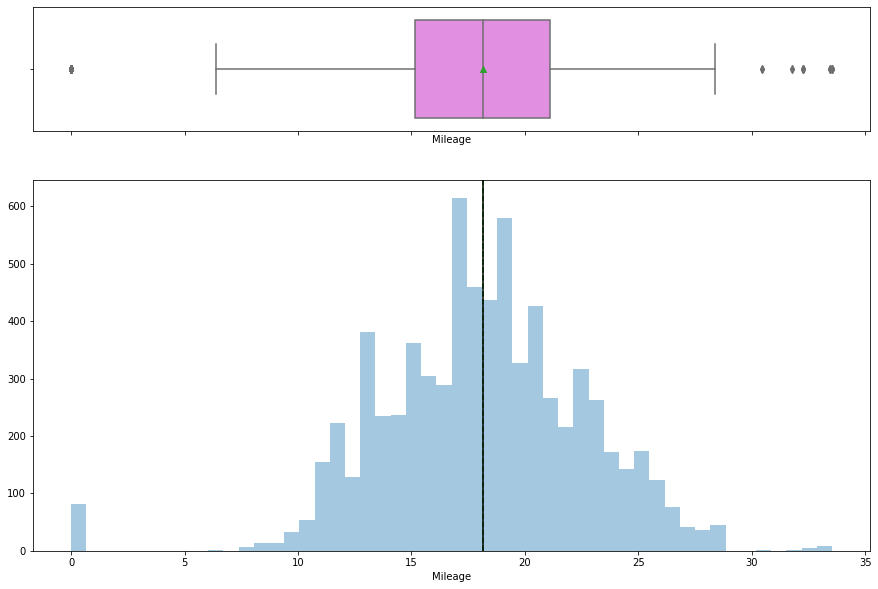

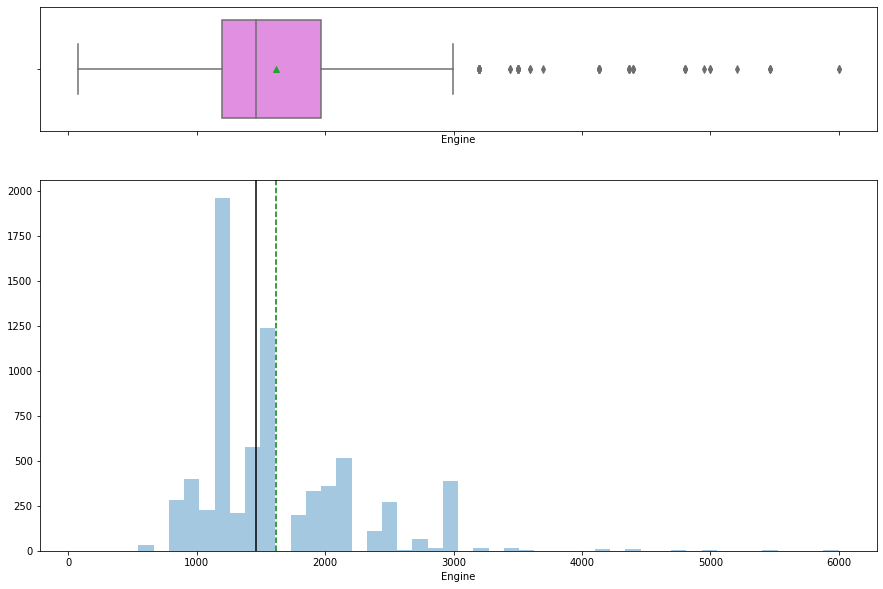

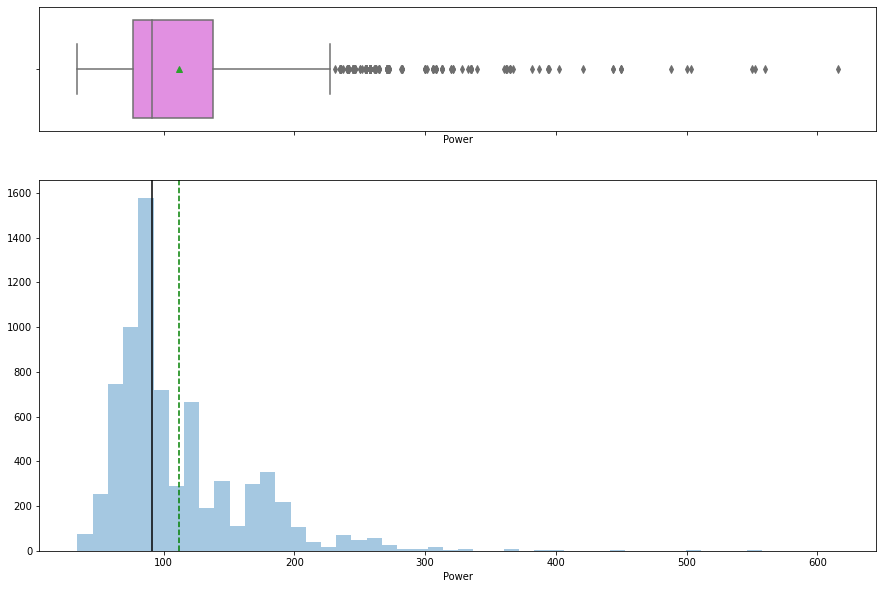

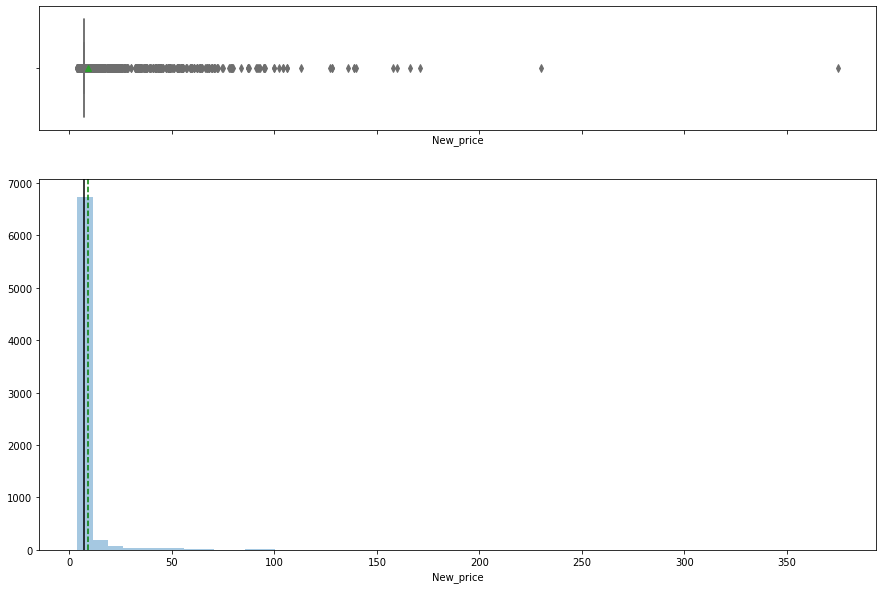

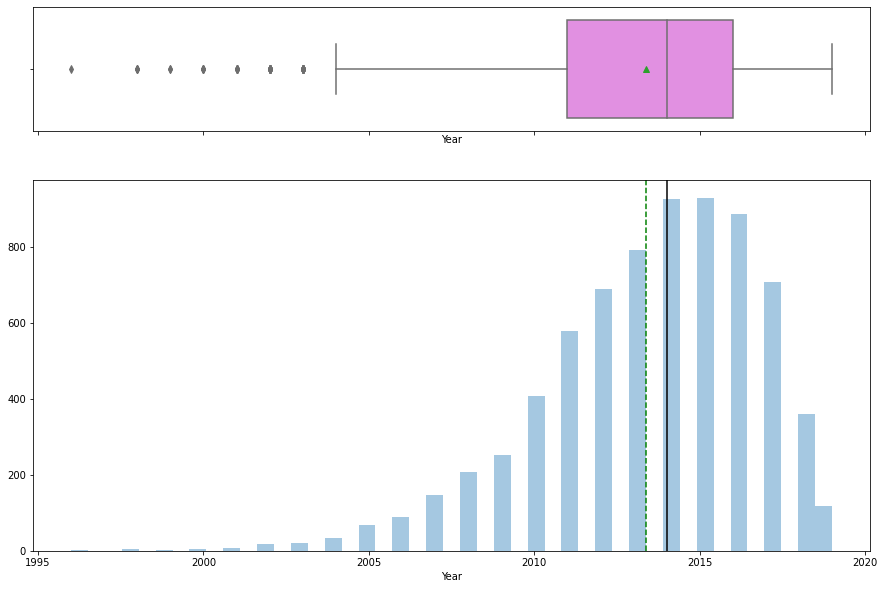

In [60]:
cat_vars  = ['Mileage', 'Engine','Power', 'New_price', 'Year']
for i in cat_vars:
  histogram_boxplot(data[i])

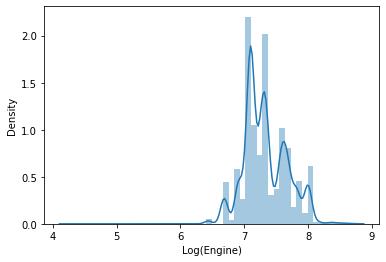

In [61]:
#log transfomration of the Engine
sns.distplot(np.log(data['Engine']), axlabel = "Log(Engine)");

In [62]:
# We can Add a transformed Engine feature in data
data["Engine_log"] = np.log(data["Engine"])

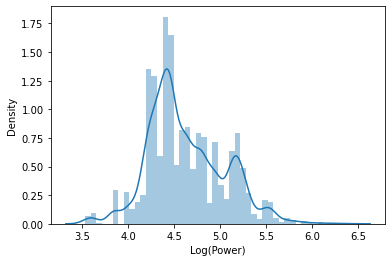

In [63]:
#log transfomration of the Power
sns.distplot(np.log(data['Power']), axlabel = "Log(Power)");

In [64]:
# We can Add a transformed Power feature in data
data["Power_log"] = np.log(data["Power"])

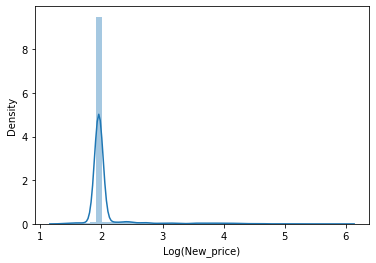

In [65]:
#log transfomration of the New_price
sns.distplot(np.log(data['New_price']), axlabel = "Log(New_price)");

In [66]:
# We can Add a transformed New_price feature in data
data["New_price_log"] = np.log(data["New_price"])

In [67]:
#dropping the missing values in price
data.dropna(inplace = True)

In [68]:
#checking to see whether all the missing values were filled
data.isna().sum()

S.No.                    0
Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
New_price                0
Price                    0
kilometers_driven_log    0
brand_name               0
Engine_log               0
Power_log                0
New_price_log            0
dtype: int64

## **Milestone 2**

## **Model Building**

1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

In [69]:
# Step-1
# we are dropping 'Name','Price','price_log','Kilometers_Driven' columns
X = data.drop(['Name','Price','Kilometers_Driven', 'New_price', 'S.No.', 'Engine', 'Power'], axis = 1)

y = data[["Price"]]

In [70]:
# Step-2 Use pd.get_dummies(drop_first = True)
X = pd.get_dummies(X, drop_first = True)

In [71]:
# Step-3 Splitting data into training and test set:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

print(X_train.shape, X_test.shape)

(4212, 55) (1806, 55)


In [72]:

#import metrics
from sklearn import metrics

# Let us write a function for calculating r2_score and RMSE on train and test data
# This function takes model as an input on which we have trained particular algorithm
# The categorical column as the input and returns the boxplots and histograms for the variable

def get_model_score(model, flag = True):
    '''
    model : regressor to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list = [] 
    
    pred_train = model.predict(X_train)
    
    pred_train_ = np.exp(pred_train)
    
    pred_test = model.predict(X_test)
    
    pred_test_ = np.exp(pred_test)
    
    train_r2 = metrics.r2_score(y_train['Price'], pred_train_)
    
    test_r2 = metrics.r2_score(y_test['Price'], pred_test_)
    
    train_rmse = metrics.mean_squared_error(y_train['Price'], pred_train_, squared = False)
    
    test_rmse = metrics.mean_squared_error(y_test['Price'], pred_test_, squared = False)
    
    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True: 
        
        print("R-sqaure on training set : ", metrics.r2_score(y_train['Price'], pred_train_))
        
        print("R-square on test set : ", metrics.r2_score(y_test['Price'], pred_test_))
        
        print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train['Price'], pred_train_)))
        
        print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test['Price'], pred_test_)))
    
    # Returning the list with train and test scores
    return score_list

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### **Fitting a linear model**

In [73]:
# Import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [74]:
# Create a linear regression model
lr = LinearRegression()

In [75]:
# Fit linear regression model
lr.fit(X_train, y_train['Price']) 

LinearRegression()

In [76]:
# Get score of the model
LR_score = get_model_score(lr)

R-sqaure on training set :  -187.30154466972792
R-square on test set :  -189.41557703794984
RMSE on training set :  11.953194967665176
RMSE on test set :  12.127115779165607


**Observations**
- The R-square value is too large. 

**Important variables of Linear Regression**

Building a model using statsmodels.

In [77]:
# Import Statsmodels 
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly
x_train = sm.add_constant(X_train)

# Add constant to test data
x_test = sm.add_constant(X_test)

def build_ols_model(train):
    
    # Create the model
    olsmodel = sm.OLS(y_train["Price"], train)
    
    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)

print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1007.
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:23:54   Log-Likelihood:                 210.99
No. Observations:                4212   AIC:                            -310.0
Df Residuals:                    4156   BIC:                             45.39
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [78]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns = ['coef'])

olsmod['pval'] = olsmodel1.pvalues

In [79]:
# Filter by significant p-value (pval <= 0.05) and sort descending by Odds ratio

olsmod = olsmod.sort_values(by = "pval", ascending = False)

pval_filter = olsmod['pval']<= 0.05

olsmod[pval_filter]

,coef,pval
Location_Jaipur,-0.044995,4.878479e-02
brand_name_Maruti,-0.478453,4.176528e-02
brand_name_Skoda,-0.486274,3.916051e-02
Location_Mumbai,-0.046883,2.389657e-02
brand_name_Honda,-0.532029,2.380831e-02
brand_name_Hyundai,-0.538861,2.189817e-02
brand_name_Renault,-0.548332,2.014691e-02
brand_name_Volkswagen,-0.551713,1.901186e-02
brand_name_Nissan,-0.558029,1.822335e-02
brand_name_Ford,-0.581182,1.340399e-02


In [80]:
# We are looking are overall significant varaible

pval_filter = olsmod['pval']<= 0.05
imp_vars = olsmod[pval_filter].index.tolist()

# We are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)

                
start = '\033[1m'
end = '\033[95m'
print(start+ 'Most overall significant categorical varaibles of LINEAR REGRESSION  are ' +end,':\n', sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['Location', 'brand_name', 'Fuel_Type', 'Owner_Type', 'Mileage', 'Seats', 'Transmission', 'Engine', 'Engine_log', 'kilometers_driven_log', 'Power', 'Power_log', 'Year']


**Build Ridge / Lasso Regression similar to Linear Regression:**<br>

In [81]:
# Import Ridge/ Lasso Regression from sklearn
from sklearn.linear_model import Ridge


In [82]:
# Create a Ridge regression model
ridge = Ridge(alpha = 1.0)

In [83]:
# Fit Ridge regression model
ridge.fit(X_train, y_train['Price'])

Ridge()

In [84]:
# Get score of the model
ridge_score = get_model_score(ridge)

R-sqaure on training set :  -181.8468356869469
R-square on test set :  -187.8350149265282
RMSE on training set :  11.778792915335137
RMSE on test set :  12.076679775725617


**Observations**
- it's observed that the R-square value on the ridge model is less than that of the linear regression model. 
- it's also observed that the RMSE of both the training ans test sets are slightly lower than those of the linear regression model 
- This model performs slightly better than the linear regression model

### **Decision Tree** 

In [85]:
# Import Decision tree for Regression from sklearn
from sklearn.tree import DecisionTreeRegressor

In [86]:
# Create a decision tree regression model, use random_state = 1
dtree = DecisionTreeRegressor(random_state = 1)

In [87]:
# Fit decision tree regression model
dtree.fit(X_train, y_train['Price'])

DecisionTreeRegressor(random_state=1)

In [88]:
# Get score of the model
Dtree_model = get_model_score(dtree)

R-sqaure on training set :  -218.26663757721113
R-square on test set :  -239.86753277827677
RMSE on training set :  12.89862273230041
RMSE on test set :  13.639404814807191


**Observations**
- it's observed that the r-sqaured value on both the training and the test data set is slightly lower than that of the ridge model.
- it laso observed that the error difference between the training set and the test set on the decision tree is lower than that observed from both the ridge model and the linear regression model 

In [89]:
#printing the feature importance in the tree bulding 
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
Power_log                  6.165740e-01
Year                       2.314580e-01
Engine_log                 4.487759e-02
kilometers_driven_log      1.758711e-02
Mileage                    1.240489e-02
brand_name_Land            6.155954e-03
New_price_log              5.683124e-03
brand_name_Tata            4.999921e-03
Location_Kolkata           4.978348e-03
brand_name_Honda           4.618402e-03
Transmission_Manual        4.521010e-03
brand_name_Audi            3.642094e-03
brand_name_Mini            3.175331e-03
brand_name_Mahindra        3.035806e-03
Location_Hyderabad         2.894630e-03
brand_name_Skoda           2.652299e-03
brand_name_BMW             2.521630e-03
brand_name_Hyundai         2.174713e-03
Location_Coimbatore        2.141056e-03
brand_name_Volkswagen      1.944752e-03
Fuel_Type_Petrol           1.881679e-03
Location_Delhi             1.752004e-03
Owner_Type_Second          1.631065e-03
Location_Mumbai            1.541991e-03


**Observations**
- power is seen to be the highest predictor of the future car prices since it has the highest importance and the Lamborghini brand name is observed to be the lowest predictor the future car prices since it has the lowest importance. 

### **Random Forest**

In [90]:
# Import Randomforest for Regression from sklearn
from sklearn.ensemble import RandomForestRegressor

In [91]:
# Create a Randomforest regression model 
rforest = RandomForestRegressor(random_state = 1)

In [92]:
# Fit Randomforest regression model
rforest.fit(X_train, y_train['Price'])

RandomForestRegressor(random_state=1)

In [93]:
# Get score of the model
rforest_model = get_model_score(rforest)

R-sqaure on training set :  -194.60942331898792
R-square on test set :  -183.4652802834197
RMSE on training set :  12.182935596039059
RMSE on test set :  11.936131789812288


**Observations**
- In comparison with the above algorithms/ models, it's observed that the r-square and the RMSE of both the training and test set have reduced significantly. This model performs better than the previous models. 

In [94]:
#printing feature importance
print(pd.DataFrame(rforest.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
Power_log                  6.145334e-01
Year                       2.323182e-01
Engine_log                 3.718750e-02
kilometers_driven_log      1.938668e-02
Mileage                    1.650274e-02
New_price_log              6.922464e-03
brand_name_Land            5.440107e-03
Location_Kolkata           5.378510e-03
brand_name_Tata            5.277046e-03
Transmission_Manual        5.059467e-03
Seats                      3.863670e-03
brand_name_Honda           3.764738e-03
Location_Hyderabad         3.020151e-03
brand_name_Mahindra        2.900368e-03
brand_name_Mercedes-Benz   2.658885e-03
brand_name_BMW             2.448650e-03
brand_name_Audi            2.298942e-03
Location_Coimbatore        2.260801e-03
brand_name_Mini            2.200587e-03
brand_name_Skoda           1.871023e-03
Owner_Type_Second          1.746871e-03
brand_name_Toyota          1.631078e-03
Fuel_Type_Diesel           1.581683e-03
Location_Bangalore         1.567327e-03


**Observations**
- It's again observed that the Power has the highest importance hence is the biggest predictor of future car prices while brand_name_force has the lowest importance anad hence is the lowest predictor of future car prices. 

### **Hyperparameter Tuning: Decision Tree**

In [95]:
# For tuning the model
from sklearn.model_selection import GridSearchCV

# Choose the type of estimator 
dtree_tuned = DecisionTreeRegressor(random_state = 1)

# Grid of parameters to choose from

parameters = {'max_depth': np.arange(2, 7),
              'criterion': ['squared_error', 'friedman_mse'],
              'min_samples_leaf': [1,2,5,10],
              'random_state': [1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(get_model_score, greater_is_better = False)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring = scorer, cv = 10)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the model to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=1)

In [96]:
# Get score of the dtree_tuned
dtree_tuned_score = get_model_score(dtree_tuned)

R-sqaure on training set :  -99.80265500330414
R-square on test set :  -106.36617440835086
RMSE on training set :  8.745669222334767
RMSE on test set :  9.10625959535169


**Observations**
- On tuning the decision tree model, it's observed that the R-square and the RMSE of both the training and test set have significantly reduced as compared to the previous models meaning that this model performs signiuficantly better than the previous models. 

**Feature Importance**

In [97]:
print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Power_log                  0.739406
Year                       0.260594
brand_name_Mahindra        0.000000
brand_name_Fiat            0.000000
brand_name_Force           0.000000
brand_name_Ford            0.000000
brand_name_Honda           0.000000
brand_name_Hyundai         0.000000
brand_name_ISUZU           0.000000
brand_name_Isuzu           0.000000
brand_name_Jaguar          0.000000
brand_name_Jeep            0.000000
brand_name_Lamborghini     0.000000
brand_name_Land            0.000000
brand_name_Maruti          0.000000
brand_name_Chevrolet       0.000000
brand_name_Mercedes-Benz   0.000000
brand_name_Mini            0.000000
brand_name_Mitsubishi      0.000000
brand_name_Nissan          0.000000
brand_name_Porsche         0.000000
brand_name_Renault         0.000000
brand_name_Skoda           0.000000
brand_name_Smart           0.000000
brand_name_Tata            0.000000
brand_name_Toyota          0.000000
brand_name_Volkswagen      0

**Observations**
- It's again observed that the Power has the highest importance hence is the biggest predictor of future car prices while brand_name_Volvo has the lowest importance anad hence is the lowest predictor of future car prices. 

### **Hyperparameter Tuning: Random Forest**

In [98]:
# Choose the type of Regressor
rforest_tuned = RandomForestRegressor(random_state = 1)

# Define the parameters for Grid to choose from 
parameters = {'n_estimators': [100, 190],
               "max_depth": [5, 7],
              "max_features": [0.8, 1]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(get_model_score, greater_is_better = False)

# Run the grid search
grid_obj = GridSearchCV(rforest_tuned, parameters, scoring = scorer, cv = 10)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the model to the best combination of parameters
rforest_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
rforest_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features=0.8, random_state=1)

In [99]:
# Get score of the model
rforest_tuned_score = get_model_score(rforest_tuned)

R-sqaure on training set :  -147.91124601918486
R-square on test set :  -146.10076477955295
RMSE on training set :  10.62969518113989
RMSE on test set :  10.658933497337072


**Observations**
- The R-square of this model is higher than that of the tuned decision tree and is higher than 100 which does not make sense.
- The model is also observed to have a higher RMSE than the tuned decision tree hance this model performs worse than the tuned decision tree. 

**Feature Importance**

In [100]:
# Print important features of tuned decision tree 
print(pd.DataFrame(rforest_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
Power_log                  5.493591e-01
Year                       2.339521e-01
Engine_log                 1.467764e-01
Transmission_Manual        3.008855e-02
kilometers_driven_log      9.129209e-03
Fuel_Type_Diesel           7.941876e-03
Mileage                    4.738408e-03
brand_name_Land            3.231919e-03
brand_name_Honda           2.626268e-03
New_price_log              2.613471e-03
Seats                      2.092082e-03
brand_name_Tata            1.527107e-03
brand_name_Mercedes-Benz   9.970133e-04
Fuel_Type_Petrol           9.113771e-04
brand_name_Skoda           5.763138e-04
brand_name_Audi            5.484309e-04
brand_name_Mini            4.827663e-04
Location_Kolkata           4.396743e-04
brand_name_Mahindra        4.255318e-04
brand_name_Porsche         2.529289e-04
Owner_Type_Third           2.265157e-04
brand_name_Toyota          2.104529e-04
brand_name_Volkswagen      1.878641e-04
Location_Coimbatore        1.817174e-04


**Observations**
- It's again observed that the Power has the highest importance hence is the biggest predictor of future car prices while brand_name_Volvo has the lowest importance anad hence is the lowest predictor of future car prices. 

### **KNN**

In [101]:
#import the KNN regressor library
from sklearn.neighbors import KNeighborsRegressor

In [102]:
# Choose the type of Regressor
knn = KNeighborsRegressor()

# We select the optimal value of K for which the error rate is the least in the validation data
# Let us loop over a few values of K to determine the optimal value of K

train_error = []

test_error = []

knn_many_split = {}

error_df_knn = pd.DataFrame()

features = X.columns

for k in range(1, 31):
    train_error = []
    
    test_error = []
    
    lista = []
    
    knn = KNeighborsRegressor(n_neighbors = k)
    
    for i in range(100):
        x_train_new, x_val, y_train_new, y_val = train_test_split(x_train, y_train, test_size = 0.20)
    
        # Fitting K-NN on the training data
        knn.fit(x_train_new, y_train_new)
        
        # Calculating error on the training data and the validation data
        train_error.append(1 - knn.score(x_train_new, y_train_new)) 
        
        test_error.append(1 - knn.score(x_val, y_val))
    
    lista.append(sum(train_error)/len(train_error))
    
    lista.append(sum(test_error)/len(test_error))
    
    knn_many_split[k] = lista

knn_many_split

{1: [1.5227923607235016e-05, 0.18060193368891148],
 2: [0.04479056227315788, 0.14429192492728812],
 3: [0.06421878932330392, 0.14046173990179503],
 4: [0.07780287496562585, 0.1378607623134768],
 5: [0.0879990254629718, 0.13758755441703002],
 6: [0.09671925901601969, 0.14037853111683643],
 7: [0.10324948671566721, 0.14335629770284097],
 8: [0.1093116934669319, 0.14650831740023335],
 9: [0.11521565758550983, 0.14797422612324782],
 10: [0.12025416143432595, 0.14900601502706207],
 11: [0.12394058442060038, 0.15368208472983302],
 12: [0.12841407077460942, 0.15454357035547273],
 13: [0.13249239552716252, 0.15658813852628944],
 14: [0.13628718872770035, 0.15733038814776526],
 15: [0.1390799959183685, 0.16206399504514787],
 16: [0.14210974539598695, 0.16421998105579638],
 17: [0.1449736119693006, 0.1667833163594052],
 18: [0.14795461893832706, 0.16659087040966716],
 19: [0.1499807447782465, 0.16910330669441742],
 20: [0.1527516062184419, 0.17028346704655678],
 21: [0.15507734771244008, 0.17099

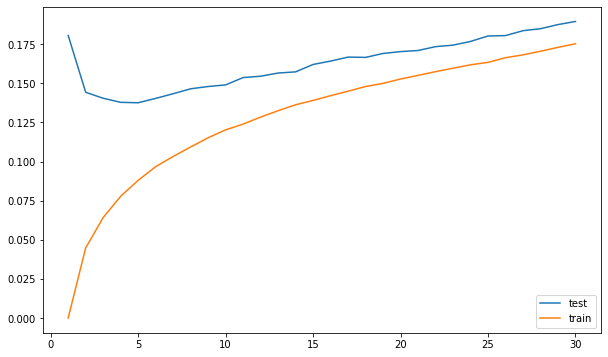

In [103]:
kltest = []

vltest = []

for k, v in knn_many_split.items():
    kltest.append(k)
    
    vltest.append(knn_many_split[k][1])

kltrain = []

vltrain = []

for k, v in knn_many_split.items():
    kltrain.append(k)
    
    vltrain.append(knn_many_split[k][0])

# Plotting K vs Error
plt.figure(figsize = (10, 6))

plt.plot(kltest, vltest, label = 'test' )

plt.plot(kltrain, vltrain, label = 'train')

plt.legend()

plt.show()


In [104]:
#import library
from sklearn.model_selection import cross_val_score
k_values = [i for i in range(1,50,2)]

#empty list that will hold cv score

k_acc_scores = []

for k in k_values:
  knn = KNeighborsRegressor(n_neighbors= k, n_jobs= -1)
  cv_scores = cross_val_score(knn, X_train, y_train,  cv = 5, scoring = 'r2')
  k_acc_scores.append(cv_scores.mean())

optimal_k = k_acc_scores.index(max(k_acc_scores))

print('Our optimal k value is {}'.format(optimal_k))

Our optimal k value is 1


**Observations**
- It's observed that the optimal number of k is 1

In [105]:
#developing the model
# Define K-NN model
knn = KNeighborsRegressor(n_neighbors = 1 )


In [106]:
#fit the model
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [107]:
# Get score of the model
knn_score = get_model_score(knn)

R-sqaure on training set :  -218.25237640362087
R-square on test set :  -204.48817942534484
RMSE on training set :  12.898203260165879
RMSE on test set :  12.597945043586153


**Observations**
- it's observed that the R-square on the test set is higher than that on the training set. 
-  it's also observed that the R-square on both the training and test set nis higher than that of the tuned decision tree and it's higher than 100% hence i wouldn't cnsider it. 

## **Trying boosting models**

In [108]:
# Installing the xgboost library using the 'pip' command.
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [109]:
# Importing the AdaBoostRegressor and GradientBoostingRegressor [Boosting]
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

# Importing the XGBRegressor from the xgboost library
from xgboost import XGBRegressor


### **ADAboost Model**

In [110]:
# Adaboost Regressor
adaboost_model = AdaBoostRegressor(random_state = 1)

# Fitting the model
adaboost_model.fit(X_train, y_train)

# Model Performance on the test data
adaboost_model_perf_test = get_model_score(adaboost_model)


adaboost_model_perf_test

R-sqaure on training set :  -89.75642845703335
R-square on test set :  -88.41096956284863
RMSE on training set :  8.298426664450295
RMSE on test set :  8.310012737082118


[-89.75642845703335, -88.41096956284863, 8.298426664450295, 8.310012737082118]

**Observations**
- The adaboost_model has the most sensible r-square value as compared to the rest of the models and also has the lowest RMSE as compared to all the  models hence has the best performance overall. 

### **Gradient Boost Regressor**

In [112]:
# Gradient Boost Regressor
gbc = GradientBoostingRegressor(random_state = 1)

# Fitting the model
gbc.fit(X_train, y_train)

# Model Performance on the test data
gbc_perf_test = get_model_score(gbc)

gbc_perf_test

R-sqaure on training set :  -176.88997861782525
R-square on test set :  -179.813110461798
RMSE on training set :  11.61803828972411
RMSE on test set :  11.817381223451985


[-176.88997861782525, -179.813110461798, 11.61803828972411, 11.817381223451985]

**Observations**
- The R-squared on the gbc model doesn't make sense and it also has a higher RMSE than the adaboost model hence performs worse in terms of predicting future car prices. 

In [113]:
# XGBoost Regressor
xgb = XGBRegressor(random_state = 1, eval_metric = 'logloss')

# Fitting the model
xgb.fit(X_train,y_train)

# Model Performance on the test data
xgb_perf_test = get_model_score(xgb)

xgb_perf_test

[21:51:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R-sqaure on training set :  -176.36286039684475
R-square on test set :  -180.01982182010443
RMSE on training set :  11.600812409075353
RMSE on test set :  11.824134298903093


[-176.36286039684475,
 -180.01982182010443,
 11.600812409075353,
 11.824134298903093]

**Observations**
- The R-squared on the xgb model doesn't make sense and it also has a higher RMSE than the adaboost model hence performs worse in terms of predicting future car prices. 

In [114]:
# Defining list of models you have trained
models = [lr, dtree, rforest, dtree_tuned, rforest_tuned, knn, adaboost_model, gbc, xgb]

# Defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

# Looping through all the models to get the rmse and r2 scores
for model in models:
    
    # Accuracy score
    j = get_model_score(model, False)
    
    r2_train.append(j[0])
    
    r2_test.append(j[1])
    
    rmse_train.append(j[2])
    
    rmse_test.append(j[3])

In [115]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression','Decision Tree', 'Random Forest', 'Tuned Decision Tree', 'Tuned Random Forest', 'knn', 'adaboost_model', 'gbc', 'xgb'], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE': rmse_train,'Test_RMSE': rmse_test}) 
comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Linear Regression,-187.301545,-189.415577,11.953195,12.127116
1,Decision Tree,-218.266638,-239.867533,12.898623,13.639405
2,Random Forest,-194.609423,-183.465280,12.182936,11.936132
3,Tuned Decision Tree,-99.802655,-106.366174,8.745669,9.106260
4,Tuned Random Forest,-147.911246,-146.100765,10.629695,10.658933
5,knn,-218.252376,-204.488179,12.898203,12.597945
6,adaboost_model,-89.756428,-88.410970,8.298427,8.310013
7,gbc,-176.889979,-179.813110,11.618038,11.817381
8,xgb,-176.362860,-180.019822,11.600812,11.824134


**Observations**
- The adaboost_model had the best performance out of all the models with the lowest RMSE of about 8.3 and an r2 value of about 89 that makes the most sense. An r2 value of 89 means that the model predicts future car prices with an 89% accuracy. 